In [6]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the MNIST dataset
digits = load_digits()

The MNIST dataset is a collection of 70,000 images of handwritten digits (0-9). Each image is 8x8 pixels, and the dataset also includes the corresponding labels for each image.

In [7]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


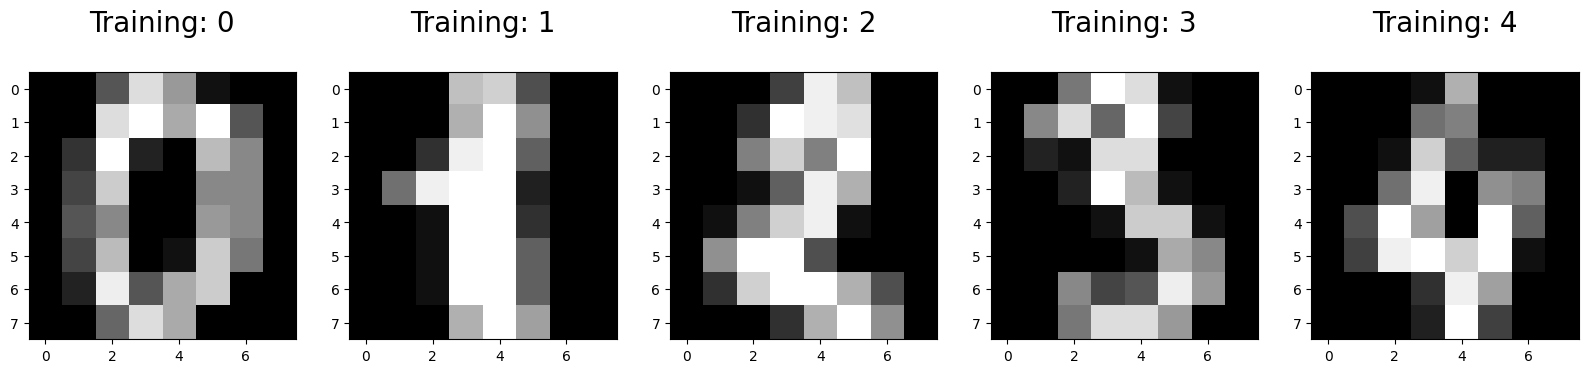

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

Split the training data into a training and test set.<br>
<br>
<b>Purpose of training and test sets:</b>
* Training set: The data the model will be trained on to learn patterns and relationships. The model uses this to make predictions.
* Test set: The data that the model has not seen before to evaluate the model's performance on unseen data.
<br><br>
By splitting the data into training and test sets, we can ensure that our model is not simply memorizing the training data and can actually generalize to new data. This is crucial for building robust and reliable machine learning models.

In [9]:
# Split the data into training and test sets (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

# Display the shapes of the training and tests sets
print("Training data shapes:")
print("  - X_train.shape:", X_train.shape)
print("  - y_train.shape:", y_train.shape)
print("Test data shapes:")
print("  - X_test.shape:", X_test.shape)
print("  - y_test.shape:", y_test.shape)

Training data shapes:
  - X_train.shape: (1257, 64)
  - y_train.shape: (1257,)
Test data shapes:
  - X_test.shape: (540, 64)
  - y_test.shape: (540,)


Use the RandomForestClassifier built into sklearn to create a classification model.

In [10]:
# Create a RandomForestClassifier instance
clf = RandomForestClassifier(n_estimators=100)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

We chose max_depth for tuning.<br>
<br>
<b>Why max_depth?:</b>
* max_depth has impact on the complexity of the model because it directly controls the maximum depth of each decision tree in the forest. Deeper trees can capture more complex relationships in the data even though, they may increase the risk of overfitting. By tuning max_depth, we can balance the model's ability to learn complex patterns with its ability to generalize to unseen data.
* Unlike some other hyperparameters, tuning max_depth doesn't significantly affect the interpretability of the model. Deeper trees might be slightly harder to interpret, but the overall concept of decision trees remains.


In [11]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameter(tuning parameter) values to try
param_grid = {'max_depth': [5, 10, 20, 40]}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search object to train the model with the different hyperparameter combinations
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model and its parameters
print("Best model:", best_model)
print("Best parameters:", best_params)

Best model: RandomForestClassifier(max_depth=10)
Best parameters: {'max_depth': 10}


Based on the output, we should set the max_depth parameter to 10 for testing on the test data.<br>
* The purpose of hyperparameter tuning is to find a model that not only performs well on the training data but also generalizes well to unseen data. By using cross-validation, GridSearchCV attempts to simulate this generalization process and find a model that is likely to perform well on new data.<br>
<br>
* Therefore, by setting max_depth=10, we're using the model configuration that GridSearchCV has identified as having the highest potential for generalization. This increases our confidence that the model will perform well on the test data, which is crucial for evaluating its true performance.


The confusion matrix for our Random Forest model on the test set.

Confusion Matrix:
[[43  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  1  0  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  1  0  0]
 [ 0  0  0  0 52  0  0  2  0  0]
 [ 0  0  0  0  1 62  0  0  0  1]
 [ 0  1  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0]
 [ 0  3  0  0  0  0  0  2 54  0]
 [ 0  0  0  1  0  0  0  0  0 58]]


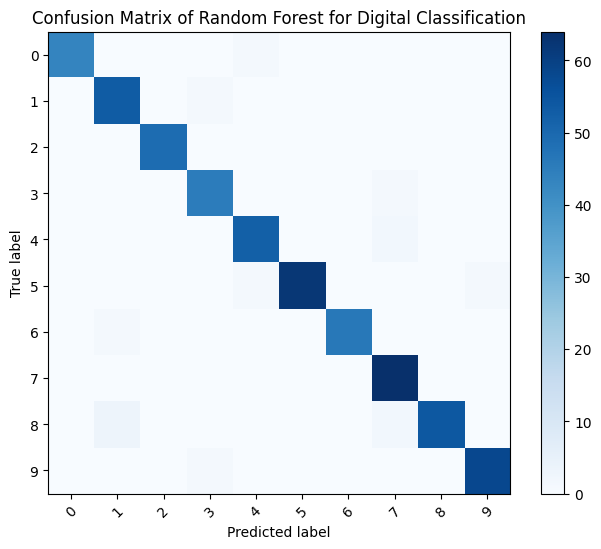

In [13]:
from sklearn.metrics import confusion_matrix

# We use our best model from our identified by GridSearchCV
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix of Random Forest for Digital Classification')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(len(digits.target_names)), digits.target_names, rotation=45)
plt.yticks(np.arange(len(digits.target_names)), digits.target_names)
plt.show()


<h5>Interpreting the results:</h5>
* <b>Overall performance:</b> The majority of digits are classified correctly, with high values on the diagonal.<br>
* <b>Specific class performance:</b> Some classes have high accuracy than others. For example class 0 (top-left) has a higher accuracy (43) compared to class 5 (bottom-right) with an accuracy of 62.<br>
* <b>False positives and negatives:</b> There are some instances where the model misclassified digits. For example, the model predicted 3 class 8 digits as other classes (false negative), and 2 digits from other classes as class 8 (false positive).

Report which classes the model struggles with the most.<br>
<br>
For each class (represented by the row and column), we would calculate the accuracy as:
* Accuracy = True Positives / (True Positives + False Negatives)

For example, for class 5 (bottom-right):
* Accuracy = 62 / (62 + 3) = 62 / 65 ≈ 0.954 (95.4%)

We will identify lower accuracy classes by looking at:
* Lower diagonal elements: Fewer correctly classified instances compared to other classes.
* Higher values outside the diagonal: More instances misclassified as other classes.
* Large difference between accuracy and overall accuracy: This indicates significant deviation from the average performance.

In [17]:
# Calculate the accuracy for each class (digit)
class_accuracies = []
for i in range(len(cm)):
    # Divide correctly classified instances by total instances for that class
    accuracy = cm[i][i] / sum(cm[i])
    class_accuracies.append(accuracy)

# Find classes with lower accuracy and more misclassifications
low_accuracy_classes = []
average_accuracy = sum(class_accuracies) / len(class_accuracies)
for i, accuracy in enumerate(class_accuracies):
    # Check if accuracy is below average and has misclassifications
    if accuracy < average_accuracy and sum(cm[i]) - cm[i][i] > 0:
        low_accuracy_classes.append(i)

# Print the interpretation for each struggling class
print("Classes the model struggles with the most:")
for class_index in low_accuracy_classes:
    class_name = "Digit " + str(class_index)  # Assuming class names are digits
    accuracy = class_accuracies[class_index]
    misclassified = sum(cm[class_index]) - cm[class_index][class_index]
    print(f"- {class_name}: Accuracy: {accuracy:.2f}, Misclassified: {misclassified}")

Classes the model struggles with the most:
- Digit 4: Accuracy: 0.96, Misclassified: 2
- Digit 5: Accuracy: 0.97, Misclassified: 2
- Digit 8: Accuracy: 0.92, Misclassified: 5


<h5>Report the accuracy, precision, recall, and f1-score </h5>

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score using macro averaging
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print("Overall Accuracy:", overall_accuracy)
print("Precision (macro):", precision)
print("Recall (macro):", recall)
print("F1-score (macro):", f1)

Overall Accuracy: 0.9740740740740741
Precision (macro): 0.9760821412218796
Recall (macro): 0.9745756530283469
F1-score (macro): 0.9748748971367768


<h5>Interpretation of the results</h5>
* <b>Overall Accuracy: 0.974:</b>This means that the model correctly classified 97.4% of the digits in our test data. This is a very good accuracy, indicating that the model is performing well overall.<br>
* <b>Precision (macro): 0.976: </b>This tells us that, on average across all classes (digits), 97.6% of the digits identified as a specific class by the model were actually that class. This means the model is good at avoiding false positives, where it predicts a digit as one class but it's actually another.<br>
* <b>Recall (macro): 0.975: </b>This indicates that, on average, the model captured 97.5% of the actual digits in each class. In other words, it didn't miss many true positives. This is also high and complements the good precision score.<br>
* <b>F1-score (macro): 0.975: </b>This combined metric balances precision and recall, and it's also very high at 0.975. This confirms that the model is doing well in both identifying the correct digits and avoiding incorrect predictions.<br>

In conclusion:<br>
While the scores are very good, it's still important to look at the confusion matrix to identify any specific classes where the model might struggle. Overall, these results are encouraging and indicate a well-performing model. 
